In [255]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.integrate import quad
plt.rc('animation', html='jshtml')

In [265]:
class Box():
    def __init__(self, y, dydx, qinit, times) -> None:
        self.qs = {}
        self.t_stored = []
        self.qinit = qinit.copy()
        self.y = y
        self.dydx = dydx
        self.times = times.copy()
        self.drawing_elements = {}
        self.dqdt = None
        self.axs_added = 0
        self.col = "C0"

    def solve_ode(self, t):
        if self.dqdt == None:
            raise Exception("No differential equation has been supplied yet")
        #if self.qinit == None:
        #    raise Exception("No initial conditions have been supplied")
        
        trange = [0.0, t]
        deltat = 0.05
        t_eval = np.arange(trange[0], trange[1]+deltat, deltat)
        my_sol = solve_ivp(self.dqdt, trange, self.qinit, t_eval=t_eval)
        self.t_stored.append(my_sol.t[-1])
        for i, sol in enumerate(my_sol.y):
            if f"q{i}" in self.qs:
                self.qs[f"q{i}"] += sol[-1]
            else:
                self.qs[f"q{i}"] = [sol[-1]]

    def update_plot_elements(self, ax, t):
        coord = self.drawing_elements[ax][0]
        if coord == "q0":
            if len(self.drawing_elements[ax]) == 1:
                ball = ax.plot(self.qinit[0], self.y(self.qinit[0]), 'o', color=self.col, ms=7, markeredgecolor="k")[0]
                self.drawing_elements[ax].append(ball)
            else:
                print("HEJ")
                pass
                #self.drawing_elements[ax][1].set_data(self.qs["q0"][-1], self.y(self.qs["q0"][-1]))
        if coord == "q1":
            if len(self.drawing_elements[ax]) == 1:
                pass

    def draw(self, ax, t):
        if t in self.times:
            if ax in self.drawing_elements:
                pass
            else:
                self.drawing_elements[ax] = [f"q{self.axs_added}"]
                self.axs_added+=1
            
            if len(self.qs) == 0:
                self.solve_ode(t=t)
                self.update_plot_elements(ax=ax, t=t)
            else:    
                if t in self.t_stored:
                    print("JEK")
                    #pass
                    self.update_plot_elements(ax=ax, t=t)
                else:
                    self.solve_ode(t=t)
                    self.update_plot_elements(ax=ax, t=t)
        else:
            raise Exception("t is not within the specified times, so will not be calculated")
        
        return self.drawing_elements[ax][1::]

In [266]:
def dqdt(t, q, y_x, dy_dx, y0=22.5, g=9.8):
    x = q[0]
    t1 = np.sqrt(2.0*g)*np.sqrt(y0-y_x(x))
    t2 = 1.0/np.sqrt(1+dy_dx(x)**2)
    return [t1*t2, t1]

def lin_ramp(x, y0=22.5-0.01, width=30.0):
    a = -y0/width
    return a*x + y0

def lin_ramp_slope(x, y0=22.5-0.01, width=30.0):
    return -y0/width

times = np.arange(1.0, 3.0, 1.0)
qinit = np.array([0.0,0.0])
box = Box(y=lin_ramp, dydx=lin_ramp_slope, qinit=qinit, times=times)
box.dqdt = lambda t, q: dqdt(t, q, y_x=lin_ramp, dy_dx=lin_ramp_slope)

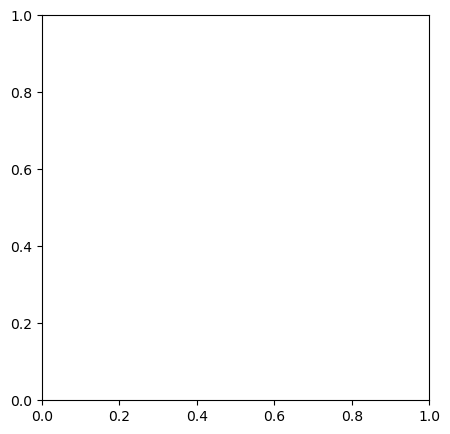

In [267]:
fig, ax = plt.subplots(figsize=(5,5))

In [268]:
ax.set_xlim([0.0, 14.0])
ax.set_ylim([0.0, 25.0])
for time in times:
    box.draw(ax=ax,t=2.0)

JEK
HEJ


In [270]:
box.t_stored
box.qs

{'q0': [10.115786589994416], 'q1': [12.64271036795899]}

In [253]:
box.draw(ax=ax, t=2.0)

JEK


[]

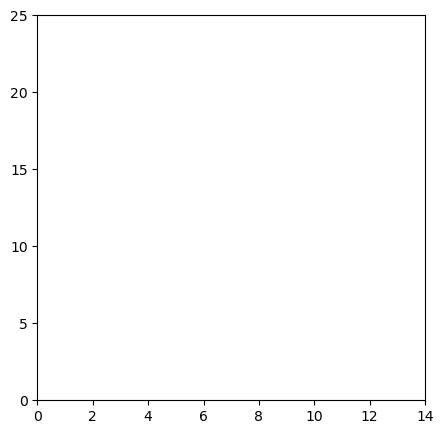

In [254]:
fig